# Assignment # 01: Data Preprocessing and Visualization

# CS471: Machine Learning
### BESE-8 AB
### Instructors: Prof. Dr. Faisal Shafait, Dr. Muhammad Muneeb Ullah
#### Due Date: March 18, 2020

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. Countries such as Italy, China, Qatar, USA, Saudi Arabia, etc, have cancelled most of the flights and a lockdown notice has been issued in Italy to avoid further wide-spread of the virus. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with early diagnosis of COVID-19, estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

In [0]:
from google.colab import files
import pandas as pd
import io

#-----------------------------Part 1----------------------------------
uploaded = files.upload()

# saving csv in data frame
dataFrame = pd.read_csv(io.BytesIO(uploaded['covid_19_data.csv']))

#-----------------------------Part 2----------------------------------
# making new data frame with dropped NA values 
newDataFrame = dataFrame.dropna(axis = 0, how ='any', inplace = False) 

#-----------------------------Part 3----------------------------------
print("\nPrinting initial 10 rows of data after dropped rows.")
display(newDataFrame.head(10))

Saving covid_19_data.csv to covid_19_data (2).csv

Printing initial 10 rows of data after dropped rows.


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

In [41]:
#--------------------------part 1-----------------------------
rankCountries = newDataFrame.sort_values("Deaths", ascending=False, inplace = False) 
print("\nCountries ranking according to Deaths")
display(rankCountries)
#--------------------------part 2----------------------------
print("\nMost affected provinces/states in top 3 countries with most number of Death Cases\n")
forDeaths = newDataFrame.groupby(['Country/Region','Province/State'])['Deaths'].max().reset_index().sort_values(by='Deaths', ascending=False)
forDeaths.drop_duplicates(subset ="Country/Region", keep = 'first', inplace = True)
display(forDeaths.head(3))

#--------------------------Part 3----------------------------

#For Recovered Cases
print("\nCountries ranking according to Recovered")
forRecovered = newDataFrame.sort_values("Recovered", ascending=False, inplace = False)
display(forRecovered)
print("\nMost affected provinces/states in top 3 countries with most number of Recovered Cases\n")
forRecovered = newDataFrame.groupby(['Country/Region','Province/State'])['Recovered'].max().reset_index().sort_values(by='Recovered', ascending=False)
forRecovered.drop_duplicates(subset ="Country/Region", keep = 'first', inplace = True)
display(forRecovered.head(3))

#For Confirmed Cases
print("\nCountries ranking according to Confirmed")
forConfirmed = newDataFrame.sort_values("Confirmed", ascending=False, inplace = False)
display(forConfirmed)
print("\nMost affected provinces/states in top 3 countries with most number of Confirmed Cases\n")
forConfirmed = newDataFrame.groupby(['Country/Region','Province/State'])['Confirmed'].max().reset_index().sort_values(by='Confirmed', ascending=False)
forConfirmed.drop_duplicates(subset ="Country/Region", keep = 'first', inplace = True)
display(forConfirmed.head(3))



Countries ranking according to Deaths


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5632,5633,03/15/2020,Hubei,Mainland China,2020-03-15T18:20:18,67794.0,3085.0,54288.0
5383,5384,03/14/2020,Hubei,Mainland China,2020-03-14T10:13:09,67790.0,3075.0,52960.0
5153,5154,03/13/2020,Hubei,Mainland China,2020-03-13T11:09:03,67786.0,3062.0,51553.0
4935,4936,03/12/2020,Hubei,Mainland China,2020-03-12T09:53:06,67781.0,3056.0,50318.0
4719,4720,03/11/2020,Hubei,Mainland China,2020-03-11T10:53:02,67773.0,3046.0,49134.0
...,...,...,...,...,...,...,...,...
1779,1780,02/18/2020,Tibet,Mainland China,2020-02-12T06:43:02,1.0,0.0,1.0
1783,1784,02/18/2020,"Boston, MA",US,2020-02-01T19:43:03,1.0,0.0,0.0
1784,1785,02/18/2020,"Los Angeles, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1785,1786,02/18/2020,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0



Most affected provinces/states in top 3 countries with most number of Death Cases



,Country/Region,Province/State,Deaths
53,Mainland China,Hubei,3085.0
29,France,France,91.0
260,US,Washington,40.0



Countries ranking according to Recovered


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5632,5633,03/15/2020,Hubei,Mainland China,2020-03-15T18:20:18,67794.0,3085.0,54288.0
5383,5384,03/14/2020,Hubei,Mainland China,2020-03-14T10:13:09,67790.0,3075.0,52960.0
5153,5154,03/13/2020,Hubei,Mainland China,2020-03-13T11:09:03,67786.0,3062.0,51553.0
4935,4936,03/12/2020,Hubei,Mainland China,2020-03-12T09:53:06,67781.0,3056.0,50318.0
4719,4720,03/11/2020,Hubei,Mainland China,2020-03-11T10:53:02,67773.0,3046.0,49134.0
...,...,...,...,...,...,...,...,...
2193,2194,02/23/2020,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0
2191,2192,02/23/2020,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
2190,2191,02/23/2020,"Sacramento County, CA",US,2020-02-21T23:13:16,1.0,0.0,0.0
2189,2190,02/23/2020,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0



Most affected provinces/states in top 3 countries with most number of Recovered Cases



,Country/Region,Province/State,Recovered
53,Mainland China,Hubei,54288.0
73,Others,Diamond Princess cruise ship,325.0
36,Hong Kong,Hong Kong,81.0



Countries ranking according to Confirmed


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5632,5633,03/15/2020,Hubei,Mainland China,2020-03-15T18:20:18,67794.0,3085.0,54288.0
5383,5384,03/14/2020,Hubei,Mainland China,2020-03-14T10:13:09,67790.0,3075.0,52960.0
5153,5154,03/13/2020,Hubei,Mainland China,2020-03-13T11:09:03,67786.0,3062.0,51553.0
4935,4936,03/12/2020,Hubei,Mainland China,2020-03-12T09:53:06,67781.0,3056.0,50318.0
4719,4720,03/11/2020,Hubei,Mainland China,2020-03-11T10:53:02,67773.0,3046.0,49134.0
...,...,...,...,...,...,...,...,...
2939,2940,03/01/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
2817,2818,02/29/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
2816,2817,02/29/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
2815,2816,02/29/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0



Most affected provinces/states in top 3 countries with most number of Confirmed Cases



,Country/Region,Province/State,Confirmed
53,Mainland China,Hubei,67794.0
29,France,France,4499.0
78,UK,United Kingdom,1140.0


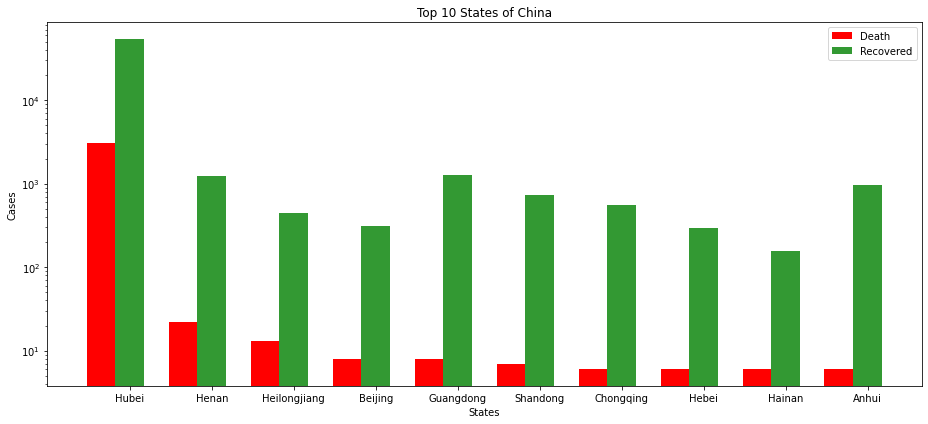

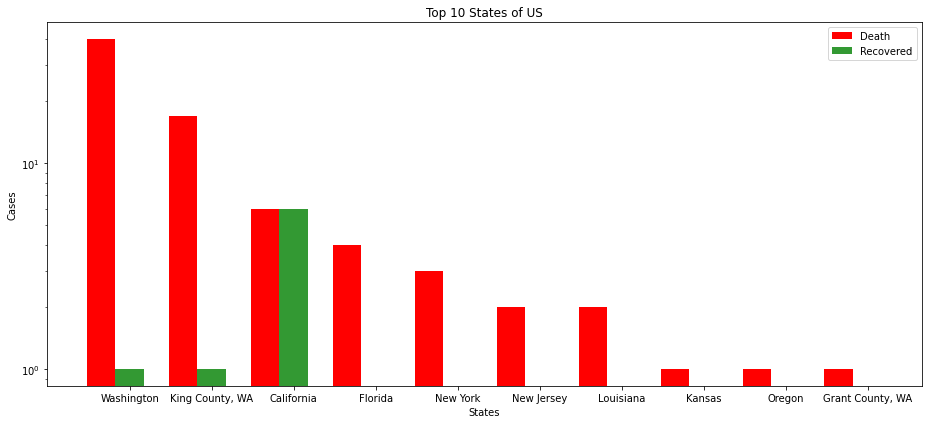

In [42]:
#--------------------------Part 4-----------------------
#Bar Chart for China States

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 10
data = newDataFrame.groupby(['Country/Region','Province/State','Recovered'])['Deaths'].max().reset_index()
data = data.sort_values("Deaths", ascending = False)
china_data = data[data['Country/Region']=='Mainland China'].drop_duplicates(subset='Province/State', inplace = False).nlargest(10,'Deaths')

china_death_cases = china_data['Deaths'].tolist()
china_recovered_cases =  china_data['Recovered'].tolist()
china_states = china_data['Province/State'].tolist()

# create plot
fig, ax = plt.subplots(figsize=(13,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, china_death_cases, bar_width, color='r', label='Death', log = True)
rects2 = plt.bar(index + bar_width, china_recovered_cases, bar_width, alpha=opacity, color='g', label='Recovered', log = True)

plt.xlabel('States')
plt.ylabel('Cases')
plt.title('Top 10 States of China')
plt.xticks(index + bar_width, china_states)
plt.legend()
plt.tight_layout()
plt.show()

#Bar Chart for US States

# data to plot
n_groups = 10
data = newDataFrame.groupby(['Country/Region','Province/State','Recovered'])['Deaths'].max().reset_index()
data = data.sort_values("Deaths", ascending = False)
us_data = data[data['Country/Region']=='US'].drop_duplicates(subset='Province/State', inplace = False).nlargest(10,'Deaths')

us_death_cases = us_data['Deaths'].tolist()
us_recovered_cases =  us_data['Recovered'].tolist()
us_states = us_data['Province/State'].tolist()

# create plot
fig, ax = plt.subplots(figsize=(13,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, us_death_cases, bar_width, color='r', label='Death', log = True)
rects2 = plt.bar(index + bar_width, us_recovered_cases, bar_width, alpha=opacity, color='g', label='Recovered', log = True)

plt.xlabel('States')
plt.ylabel('Cases')
plt.title('Top 10 States of US')
plt.xticks(index + bar_width, us_states)
plt.legend()
plt.tight_layout()
plt.show()

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

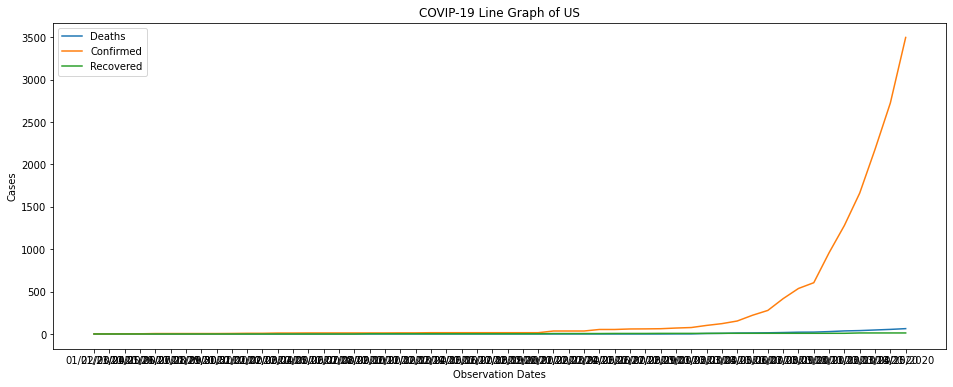

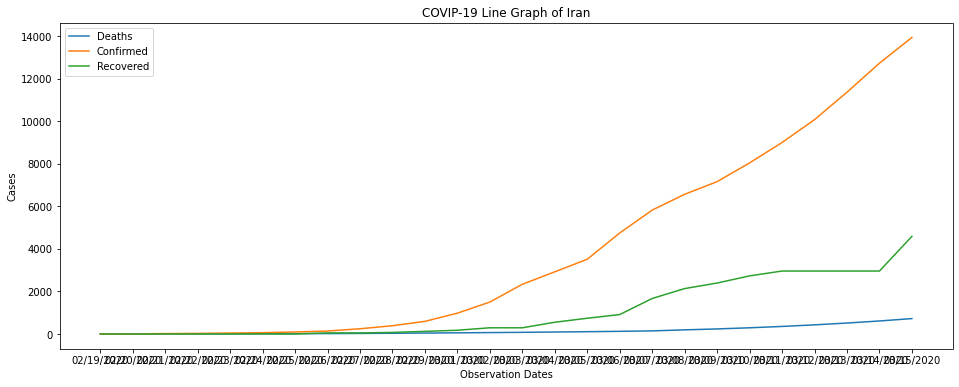

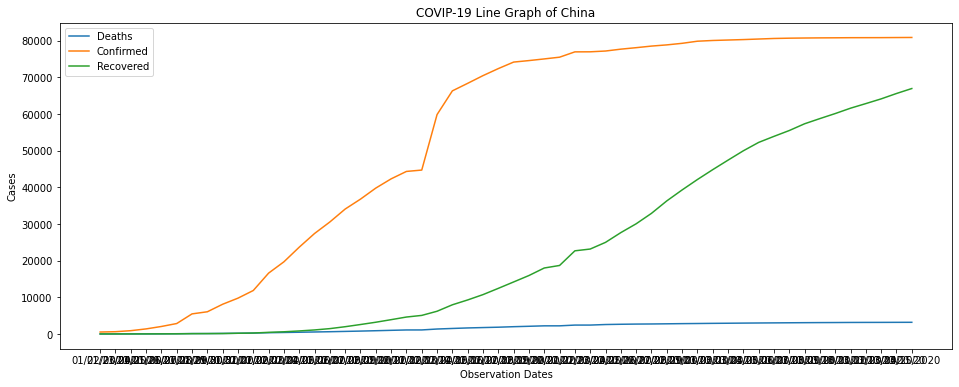

In [43]:
#------------------------Part 1------------------------
import matplotlib.pyplot as plt

#Line Graph for US

#data
us_data = newDataFrame[newDataFrame['Country/Region']=='US']
us_data = us_data.groupby('ObservationDate').sum().reset_index()

plt.subplots(figsize=(16,6))

# plotting 3 lines 
plt.plot(us_data['ObservationDate'], us_data['Deaths'], label = "Deaths")
plt.plot(us_data['ObservationDate'], us_data['Confirmed'], label = "Confirmed")
plt.plot(us_data['ObservationDate'], us_data['Recovered'], label = "Recovered")

# Set X-axis, y-axis label and Title of the plot.
plt.xlabel('Observation Dates')
plt.ylabel('Cases')
plt.title('COVIP-19 Line Graph of US')

plt.legend()
plt.show()

#Line Graph for Iran

#data
iran_data = dataFrame[dataFrame['Country/Region']=='Iran']
iran_data = iran_data.groupby('ObservationDate').sum().reset_index()

plt.subplots(figsize=(16,6))

# plotting 3 lines 
plt.plot(iran_data['ObservationDate'], iran_data['Deaths'], label = "Deaths")
plt.plot(iran_data['ObservationDate'], iran_data['Confirmed'], label = "Confirmed")
plt.plot(iran_data['ObservationDate'], iran_data['Recovered'], label = "Recovered")

# Set X-axis, y-axis label and Title of the plot.
plt.xlabel('Observation Dates')
plt.ylabel('Cases')
plt.title('COVIP-19 Line Graph of Iran')

plt.legend()
plt.show()


#Line Graph for China

#data
china_data = newDataFrame[newDataFrame['Country/Region']=='Mainland China']
china_data = china_data.groupby('ObservationDate').sum().reset_index()

plt.subplots(figsize=(16,6))

# plotting 3 lines 
plt.plot(china_data['ObservationDate'], china_data['Deaths'], label = "Deaths")
plt.plot(china_data['ObservationDate'], china_data['Confirmed'], label = "Confirmed")
plt.plot(china_data['ObservationDate'], china_data['Recovered'], label = "Recovered")

# Set X-axis, y-axis label and Title of the plot.
plt.xlabel('Observation Dates')
plt.ylabel('Cases')
plt.title('COVIP-19 Line Graph of China')

plt.legend()
plt.show()

**Answer of part 2**:
By looking at graph, China has seen a surge in confirmed cases but Iran has seen a surge in Death cases.
Initially confirmed cases in China was increasing very fast and then it becomes almost constant, Death cases in China was increasing very slow. Initially confirmed cases in Iran was increasing very slowly, after some time it was increasing very fastly but Death cases in Iran was initially increasing very slowly and then it was increasing fastly. Initially confirmed cases in US was almost zero, after some time it was increasing very fastly but Death cases in US was initially zero and then it was increasing very slowly. 

In [46]:
#----------------------Part 3-------------------------
print("I have calculated rate as average number of deaths/recovered per day\n")

print("\tDeath Rates")

us_total_deaths = sum(us_data['Deaths'])
us_total_days = len(us_data)
us_death_rate = round(us_total_deaths/us_total_days/100,3)
print("Death rate in US is: ", us_death_rate,"%")

iran_total_deaths = sum(iran_data['Deaths'])
iran_total_days = len(iran_data)
iran_death_rate = round(iran_total_deaths/iran_total_days/100,3)
print("Death rate in IRAN is: ", iran_death_rate,"%")

china_total_deaths = sum(china_data['Deaths'])
china_total_days = len(china_data)
china_death_rate = round(china_total_deaths/china_total_days/100,3)
print("Death rate in CHINA is: ", china_death_rate,"%")

#--------------------Part 4---------------------
print("\n\tRecovered Rates")

us_total_recovered = sum(us_data['Recovered'])
us_recovery_rate = round(us_total_recovered/us_total_days/100,3)
print("Recovery rate in US is: ", us_recovery_rate,"%")

iran_total_recovered = sum(iran_data['Recovered'])
iran_recovery_rate = round(iran_total_recovered/iran_total_days/100,3)
print("Recovery rate in IRAN is: ", iran_recovery_rate,"%")

china_total_recovered = sum(china_data['Recovered'])
china_recovery_rate = round(china_total_recovered/china_total_days/100,3)
print("Recovery rate in CHINA is: ", china_recovery_rate,"%")

I have calculated rate as average number of deaths/recovered per day

	Death Rates
Death rate in US is:  0.07 %
Death rate in IRAN is:  1.612 %
Death rate in CHINA is:  17.286 %

	Recovered Rates
Recovery rate in US is:  0.041 %
Recovery rate in IRAN is:  11.003 %
Recovery rate in CHINA is:  226.044 %


**Answer of part 4**: According to the above recovery rate data, the **China** has been able to efficiently and swiftly recover the confirmed cases. We can also examine it from graph as, Recovered line in China's line graph is increasing swiftly with time.

#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

In [47]:
from google.colab import files
import pandas as pd
import io

#-----------------------------Part 1----------------------------------
uploaded = files.upload()

# saving csv in data frame
dataFrame2 = pd.read_csv(io.BytesIO(uploaded['time_series_covid_19_deaths.csv']))

#-----------------------------Part 2----------------------------------
# making new data frame with dropped NA values 
newDataFrame2 = dataFrame2.dropna(axis = 0, how ='any', inplace = False) 
print("\nPrinting data after dropped rows")
display(newDataFrame2)

Saving time_series_covid_19_deaths.csv to time_series_covid_19_deaths (2).csv

Printing data after dropped rows


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421,Fench Guiana,France,4.0000,-53.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
424,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As it is not mentioned in question that which type of graph to plot so I am ploting Bar Chart


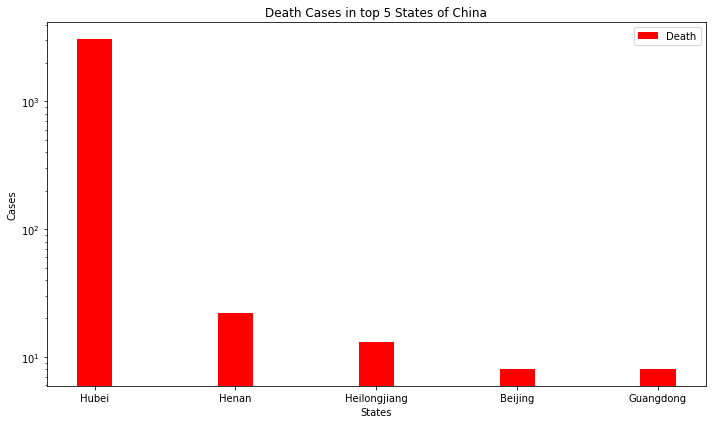

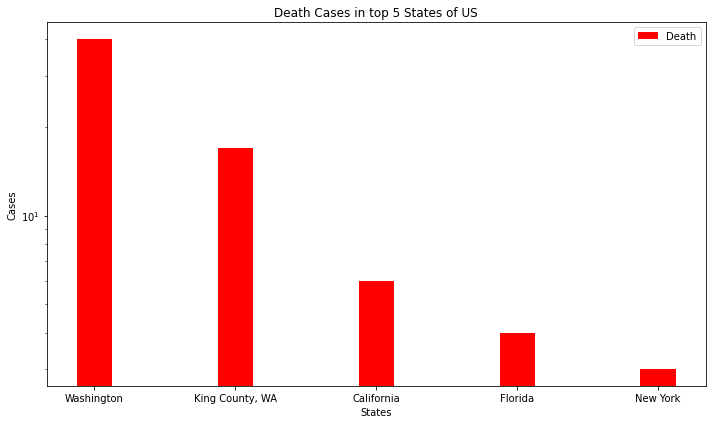

In [48]:
#-----------------------------Part 3----------------------------------
print("As it is not mentioned in question that which type of graph to plot so I am ploting Bar Chart")

#Bar plot for China

# data to plot
n_groups = 5
china_death_cases_2 = pd.DataFrame(china_death_cases, columns=['Deaths']).head(5)['Deaths'].tolist()
china_states_2 = pd.DataFrame(china_states, columns=['Province/State']).head(5)['Province/State'].tolist()

# create plot
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, china_death_cases_2, bar_width, color='r', label='Death', log = True)

plt.xlabel('States')
plt.ylabel('Cases')
plt.title('Death Cases in top 5 States of China')
plt.xticks(index, china_states_2)
plt.legend()
plt.tight_layout()
plt.show()

#Bar plot for US

# data to plot
n_groups = 5
us_death_cases_2 = pd.DataFrame(us_death_cases, columns=['Deaths']).head(5)['Deaths'].tolist()
us_states_2 = pd.DataFrame(us_states, columns=['Province/State']).head(5)['Province/State'].tolist()

# create plot
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, us_death_cases_2, bar_width, color='r', label='Death', log = True)

plt.xlabel('States')
plt.ylabel('Cases')
plt.title('Death Cases in top 5 States of US')
plt.xticks(index, us_states_2)
plt.legend()
plt.tight_layout()
plt.show()

#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [0]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

     |████████████████████████████████| 132.4MB 27kB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [21]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (176 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

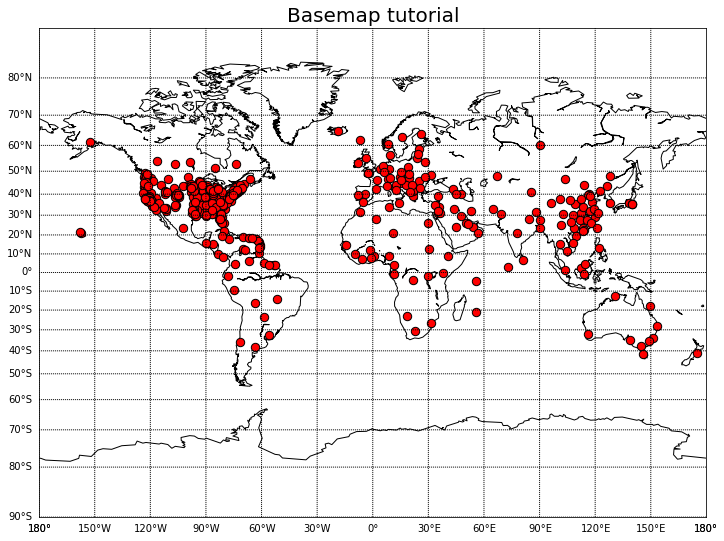

In [49]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

df = dataFrame2

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['Lat'].tolist()
sites_lon_x = df['Long'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=70, c='r', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Basemap tutorial', fontsize=20)

plt.show()

**Answer of part 2**: By examining the Base map we can see that the points scatter the most is in **North America** 

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

In [23]:
from google.colab import files
import pandas as pd
import io

#-----------------------------Part 1----------------------------------
uploaded = files.upload()

# saving csv in data frame
dataFrame3 = pd.read_csv(io.BytesIO(uploaded['COVID19_open_line_list.csv']))

Saving COVID19_open_line_list.csv to COVID19_open_line_list.csv


In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#making new data frame with dropped NA values 
newDataFrame3 = dataFrame3.dropna(subset=['age','sex','symptoms','city','province','lives_in_Wuhan','travel_history_location'],inplace=False)
mainData = newDataFrame3[['age', 'sex', 'symptoms', 'city', 'province','lives_in_Wuhan','travel_history_location']]

#replacing uppercase values to lowercase
mainData.replace(to_replace=" Female",value="female",inplace=True)
mainData.replace(to_replace="Male",value="male",inplace=True)


#encoding features
le = LabelEncoder()
mainData = mainData.apply(lambda col: le.fit_transform(col))

#calculating and displaying co-relation of fields with each other
display(mainData.corr().abs())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,age,sex,symptoms,city,province,lives_in_Wuhan,travel_history_location
age,1.000000,0.097198,0.206366,0.036567,0.025268,0.071180,0.106965
sex,0.097198,1.000000,0.038156,0.064052,0.214162,0.111063,0.112247
symptoms,0.206366,0.038156,1.000000,0.045931,0.155183,0.010755,0.130405
city,0.036567,0.064052,0.045931,1.000000,0.175379,0.230963,0.048584
province,0.025268,0.214162,0.155183,0.175379,1.000000,0.048235,0.125298
lives_in_Wuhan,0.071180,0.111063,0.010755,0.230963,0.048235,1.000000,0.158126
travel_history_location,0.106965,0.112247,0.130405,0.048584,0.125298,0.158126,1.000000


In [50]:

print('I have calculated correlation of fields after dropping rows with missing values and got that "lives_in_Wuhan" and "province" are strongly correlated.')
#picking 2 most co-related fields
X = mainData[["sex","province"]]

scaler = MinMaxScaler()
scaleX = scaler.fit_transform(X)
scaleX = pd.DataFrame(scaleX, columns=['province', 'lives_in_Wuhan'])

print('\n5 rows from head')
display(scaleX.head(5))
print('\n5 rows from tail')
display(scaleX.tail(5))

I have calculated correlation of fields after dropping rows with missing values and got that "lives_in_Wuhan" and "province" are strongly correlated.

5 rows from head


,province,lives_in_Wuhan
0,0.5,0.03125
1,0.5,0.03125
2,0.5,0.03125
3,1.0,0.03125
4,0.5,0.09375



5 rows from tail


,province,lives_in_Wuhan
147,1.0,0.12500
148,1.0,0.87500
149,1.0,0.21875
150,0.0,0.37500
151,1.0,0.37500
